**Brian Blaylock**  
*February 22, 2021*

# 🧩 HRRR in Zarr Format

Selections of the HRRR archive are made availabe in [Zarr](https://zarr.readthedocs.io/en/stable/) format on [AWS](https://registry.opendata.aws/noaa-hrrr-pds/).

### Two ways to access zarr data with xarray
1. with `fsspec`
1. with `s3fs`

In [1]:
import zarr
import fsspec
import xarray as xr

In [2]:
# Lets grab a forecast file using fsspec

url = 's3://hrrrzarr/sfc/20200903/20200903_00z_fcst.zarr/2m_above_ground/TMP/2m_above_ground/'

ds = xr.open_zarr(fsspec.get_mapper(url, anon=True))
ds.TMP

<xarray.DataArray 'TMP' (time: 36, projection_y_coordinate: 1059, projection_x_coordinate: 1799)>
dask.array<xarray-TMP, shape=(36, 1059, 1799), dtype=float16, chunksize=(36, 150, 150), chunktype=numpy.ndarray>
Dimensions without coordinates: time, projection_y_coordinate, projection_x_coordinate
Attributes:
    GRIB_PARAM:   [2, 0, 0, 0]
    coordinates:  forecast_reference_time forecast_period
    long_name:    2m_above_ground/TMP
    units:        K

In [3]:
import xarray as xr
import s3fs

In [4]:
# Let's grab an analysis file using s3fs

fs = s3fs.S3FileSystem(anon=True)
url = 'hrrrzarr/sfc/20200903/20200903_00z_anl.zarr/2m_above_ground/TMP/2m_above_ground/'
store = s3fs.S3Map(root=url, s3=fs, check=False)
ds = xr.open_zarr(store)
ds.TMP

<xarray.DataArray 'TMP' (projection_y_coordinate: 1059, projection_x_coordinate: 1799)>
dask.array<xarray-TMP, shape=(1059, 1799), dtype=float16, chunksize=(150, 150), chunktype=numpy.ndarray>
Dimensions without coordinates: projection_y_coordinate, projection_x_coordinate
Attributes:
    GRIB_PARAM:   [2, 0, 0, 0]
    coordinates:  forecast_reference_time time pressure height forecast_period
    long_name:    2m_above_ground/TMP
    units:        K

## Looks like the projection coordinates are up a level

In [5]:
fs = s3fs.S3FileSystem(anon=True)
url = 'hrrrzarr/sfc/20200903/20200903_00z_fcst.zarr/2m_above_ground/TMP'
store = s3fs.S3Map(root=url, s3=fs, check=False)
ds2 = xr.open_zarr(store)
ds2

<xarray.Dataset>
Dimensions:                  (projection_x_coordinate: 1799, projection_y_coordinate: 1059, time: 36)
Coordinates:
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.698e+06 ......
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.587e+06 ......
  * time                     (time) datetime64[ns] 2020-09-03T01:00:00 ... 20...
Data variables:
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(36,), meta=np.ndarray>
    forecast_reference_time  datetime64[ns] ...

In [6]:
ds2.projection_x_coordinate

<xarray.DataArray 'projection_x_coordinate' (projection_x_coordinate: 1799)>
array([-2697520.142522, -2694520.142522, -2691520.142522, ...,  2690479.857478,
        2693479.857478,  2696479.857478])
Coordinates:
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.698e+06 ......
Attributes:
    standard_name:  projection_x_coordinate
    units:          m

In [7]:
ds2.forecast_reference_time

<xarray.DataArray 'forecast_reference_time' ()>
array('2020-09-03T00:00:00.000000000', dtype='datetime64[ns]')
Attributes:
    standard_name:  forecast_reference_time

## The full variable (all chunks)

In [8]:
ds.TMP

<xarray.DataArray 'TMP' (projection_y_coordinate: 1059, projection_x_coordinate: 1799)>
dask.array<xarray-TMP, shape=(1059, 1799), dtype=float16, chunksize=(150, 150), chunktype=numpy.ndarray>
Dimensions without coordinates: projection_y_coordinate, projection_x_coordinate
Attributes:
    GRIB_PARAM:   [2, 0, 0, 0]
    coordinates:  forecast_reference_time time pressure height forecast_period
    long_name:    2m_above_ground/TMP
    units:        K

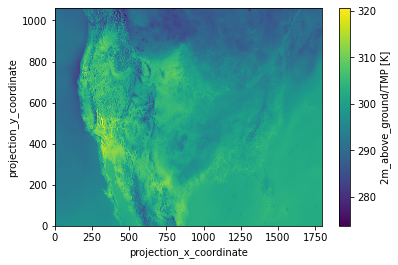

In [9]:
ds.TMP.plot()

## Part of the variable; Western United States

In [10]:
ds.TMP[:, :500]

<xarray.DataArray 'TMP' (projection_y_coordinate: 1059, projection_x_coordinate: 500)>
dask.array<getitem, shape=(1059, 500), dtype=float16, chunksize=(150, 150), chunktype=numpy.ndarray>
Dimensions without coordinates: projection_y_coordinate, projection_x_coordinate
Attributes:
    GRIB_PARAM:   [2, 0, 0, 0]
    coordinates:  forecast_reference_time time pressure height forecast_period
    long_name:    2m_above_ground/TMP
    units:        K

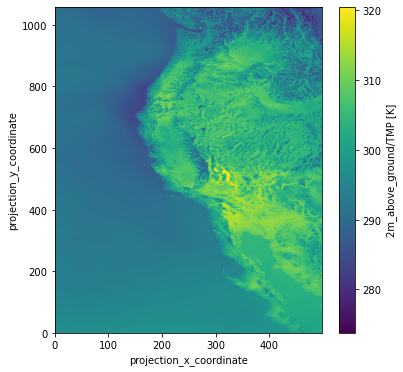

In [11]:
ds.TMP[:, :500].plot(figsize=(6,6))